In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import sklearn

In [2]:
train_dataset = pd.read_csv("../dataset/fraudTrain.csv")
test_dataset = pd.read_csv("../dataset/fraudTest.csv")
train_dataset.shape, test_dataset.shape

((1296675, 23), (555719, 23))

In [3]:
df = pd.concat([train_dataset, test_dataset])
df.to_csv("../dataset/CreditCardData.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
# Extract date and time separately
df['trans_date'] = df['trans_date_trans_time'].dt.strftime("%Y-%m-%d")
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [8]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [9]:
df.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_date
count,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1852394
mean,2020-01-20 21:31:46.801827328,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1973-10-15 11:05:05.744458256,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,2020-01-20 08:13:25.435561216
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,2019-01-01 00:00:00
25%,2019-07-23 04:13:43.750000128,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1962-08-13 00:00:00,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,2019-07-23 00:00:00
50%,2020-01-02 01:15:31,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1975-11-30 00:00:00,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,2020-01-02 00:00:00
75%,2020-07-23 12:11:25.249999872,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-04-23 00:00:00,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,2020-07-23 00:00:00
max,2020-12-31 23:59:34,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2020-12-31 00:00:00
std,NaN,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,NaN


In [10]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

In [11]:
df['is_fraud_cat'] = df['is_fraud'].apply(lambda X: "Fraud" if X == 1 else "Not Fraud")
df['is_fraud_cat'].astype(dtype="object")
df['is_fraud_cat'].value_counts()

is_fraud_cat
Not Fraud    1842743
Fraud           9651
Name: count, dtype: int64

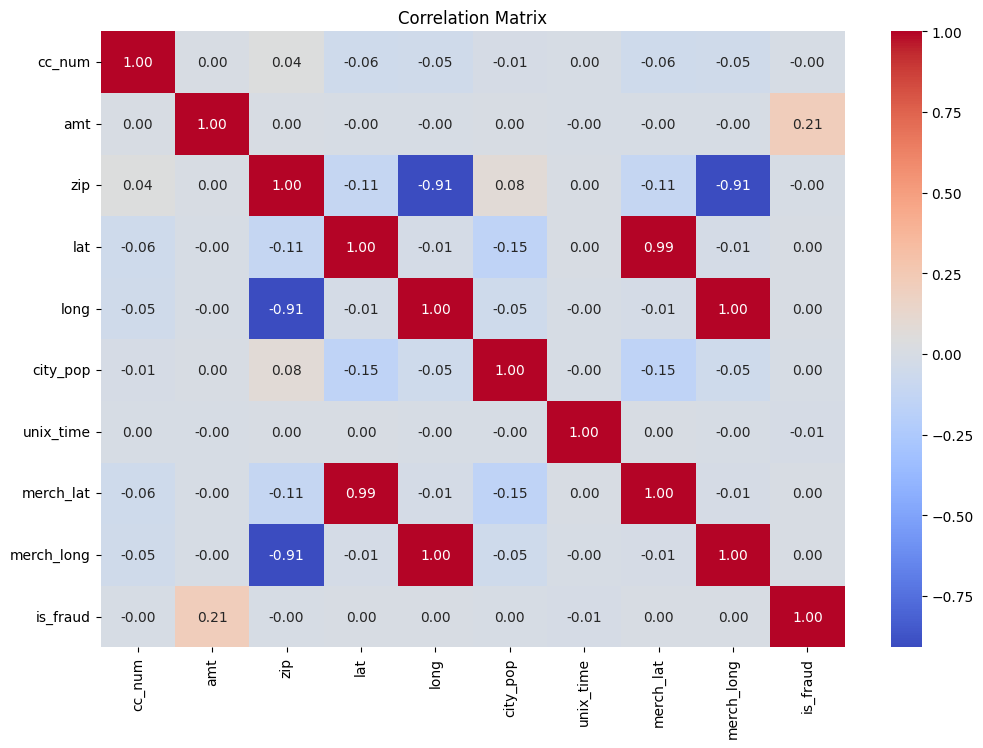

In [12]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


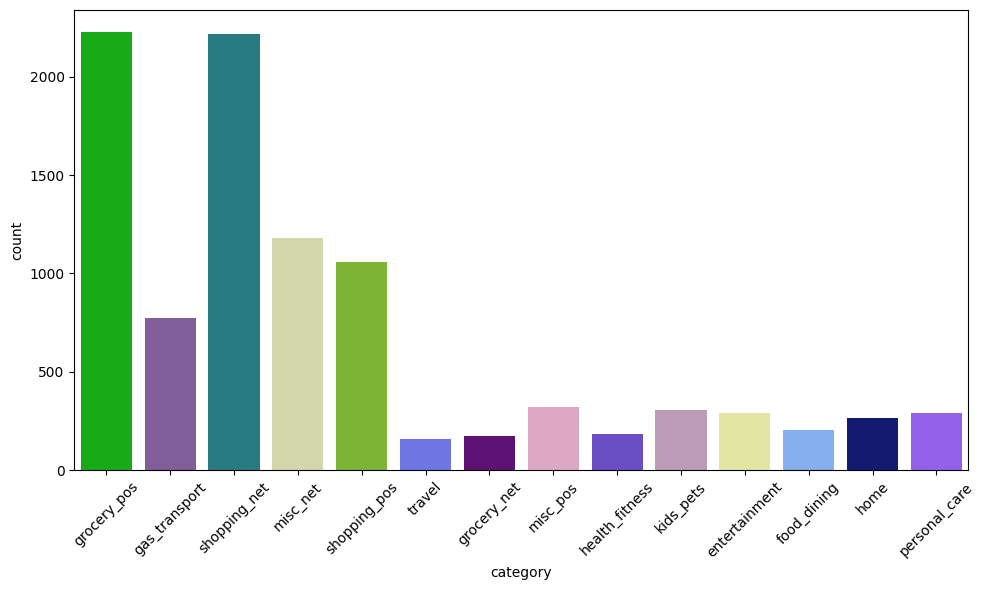

In [13]:
random_colors = [f'#{np.random.randint(0, 0xFFFFFF):06x}' for _ in df['category'].unique()]

plt.figure(figsize=(10,6))
sns.countplot(data=df[df['is_fraud_cat'] == 'Fraud'], x='category', palette=random_colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### most of the fraud transactions are occured in grocery_ps and shopping_net categories

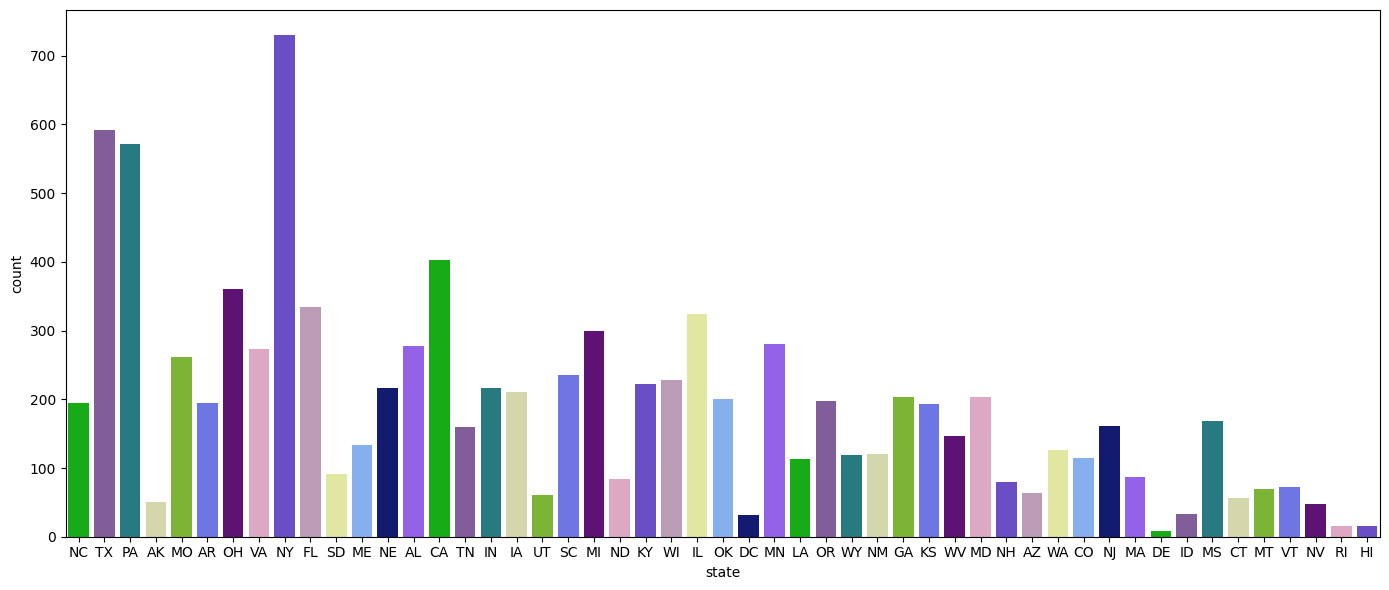

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['is_fraud_cat'] == 'Fraud'], x='state', palette=random_colors)
plt.tight_layout()
plt.show()

#### most fraud transactions occured in NY, TX & PA states

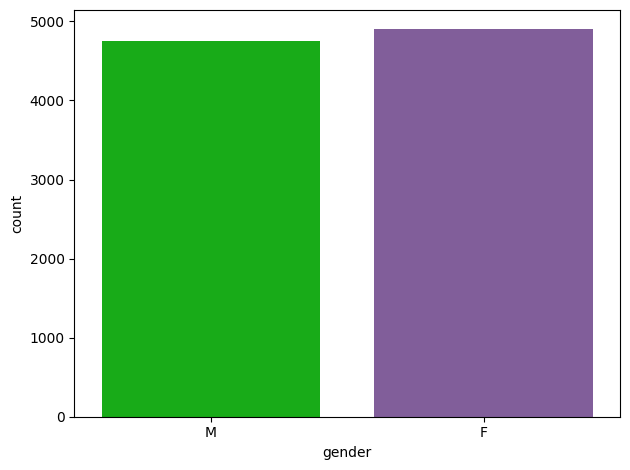

In [15]:
sns.countplot(data=df[df['is_fraud_cat'] == 'Fraud'], x='gender', palette=random_colors)
plt.tight_layout()
plt.show()

#### almost female and males Frauds are same.

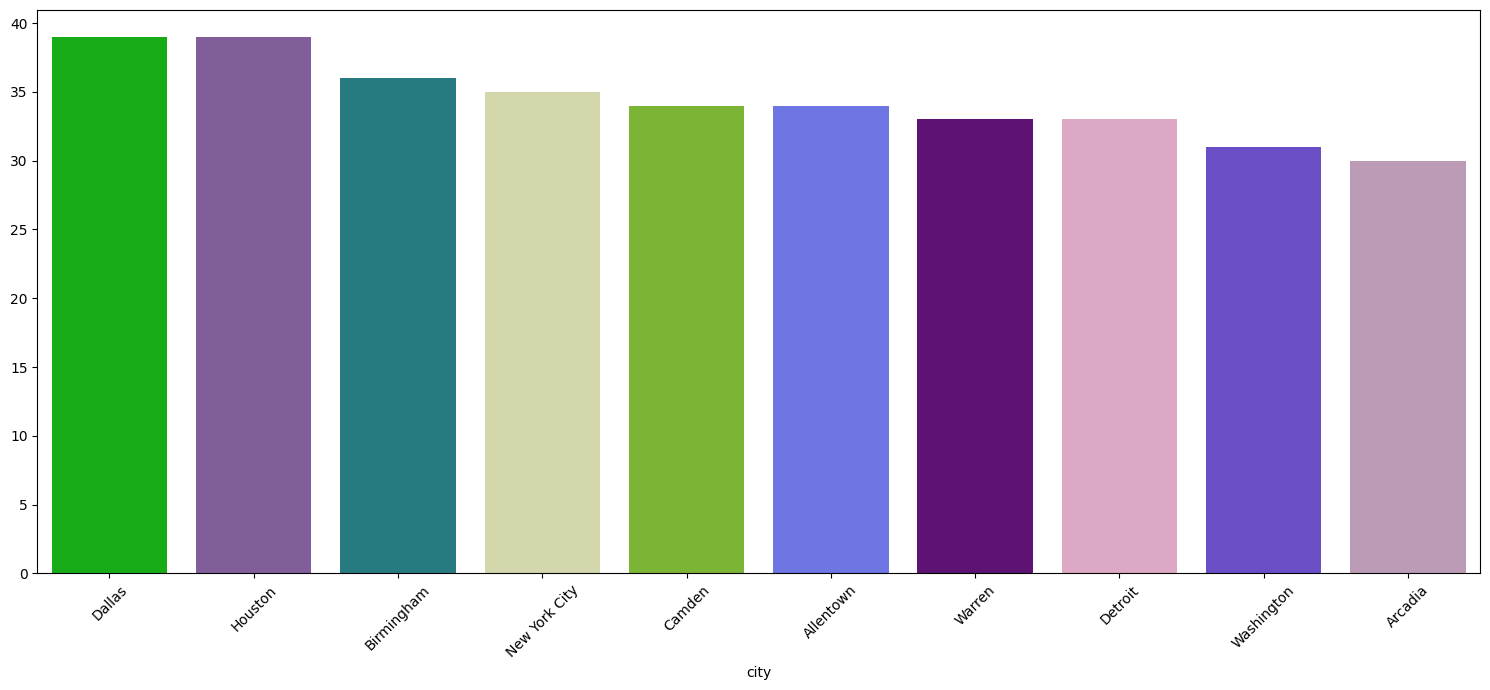

In [16]:
plt.figure(figsize=(15,7))
top_fraud_cities = df[df['is_fraud_cat'] == 'Fraud']['city'].value_counts().head(10)
sns.barplot(y=top_fraud_cities.values, x=top_fraud_cities.index, palette=random_colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### top 10 fraud cities

In [17]:
df_categorical_features.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

In [18]:
df[df['is_fraud_cat'] == "Fraud"]['job'].value_counts()

job
Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Pension scheme manager                    4
Designer, exhibition/display              4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: count, Length: 494, dtype: int64

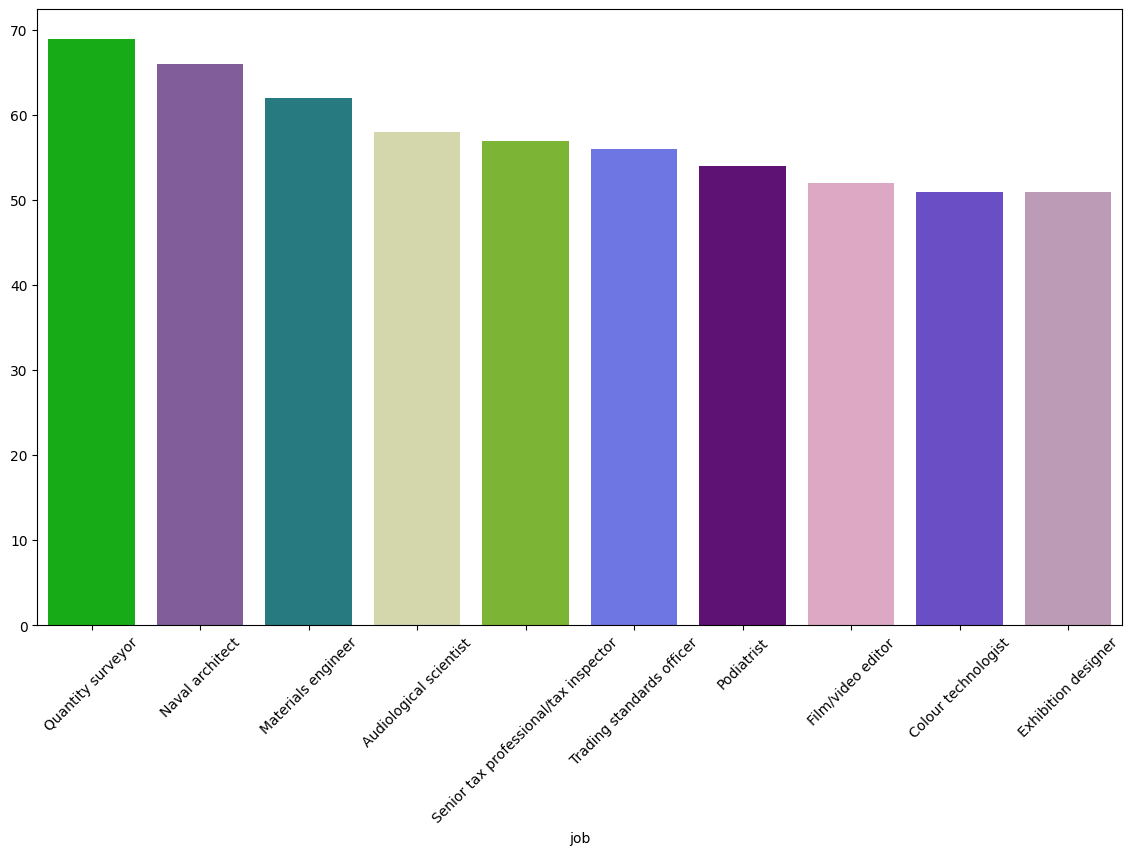

In [19]:
plt.figure(figsize=(14,8))
top_fraud_job = df[df['is_fraud_cat'] == "Fraud"]['job'].value_counts().head(10)
sns.barplot(y=top_fraud_job.values, x=top_fraud_job.index, palette=random_colors)
plt.xticks(rotation=45)
plt.show()

#### quantity surveyor and Naval architect are most fraud jobs

In [20]:
num_cal = []
for feature in df.columns:
    if feature not in df_categorical_features.columns:
        num_cal.append(feature)

num_cal

['trans_date_trans_time',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_date',
 'is_fraud_cat']

In [21]:
numerical_columns = [column for column in df.columns if column not in df_categorical_features.columns]
numerical_columns

['trans_date_trans_time',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_date',
 'is_fraud_cat']

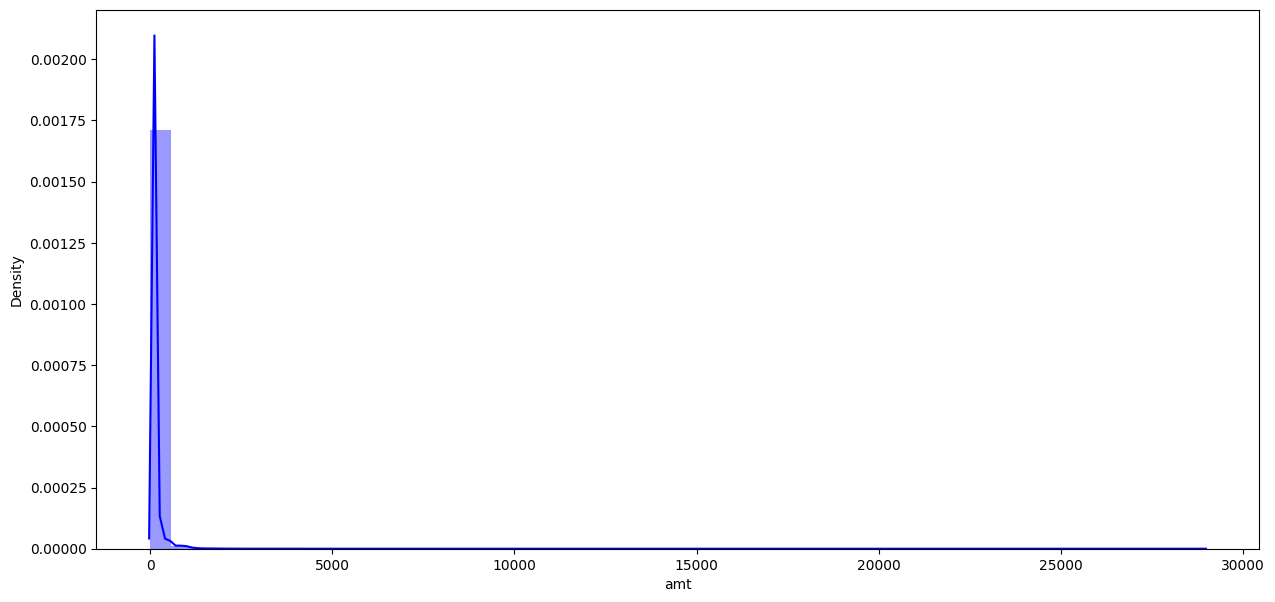

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(df['amt'], color="blue")
plt.show()

#### the amount of fraud transactions is very less

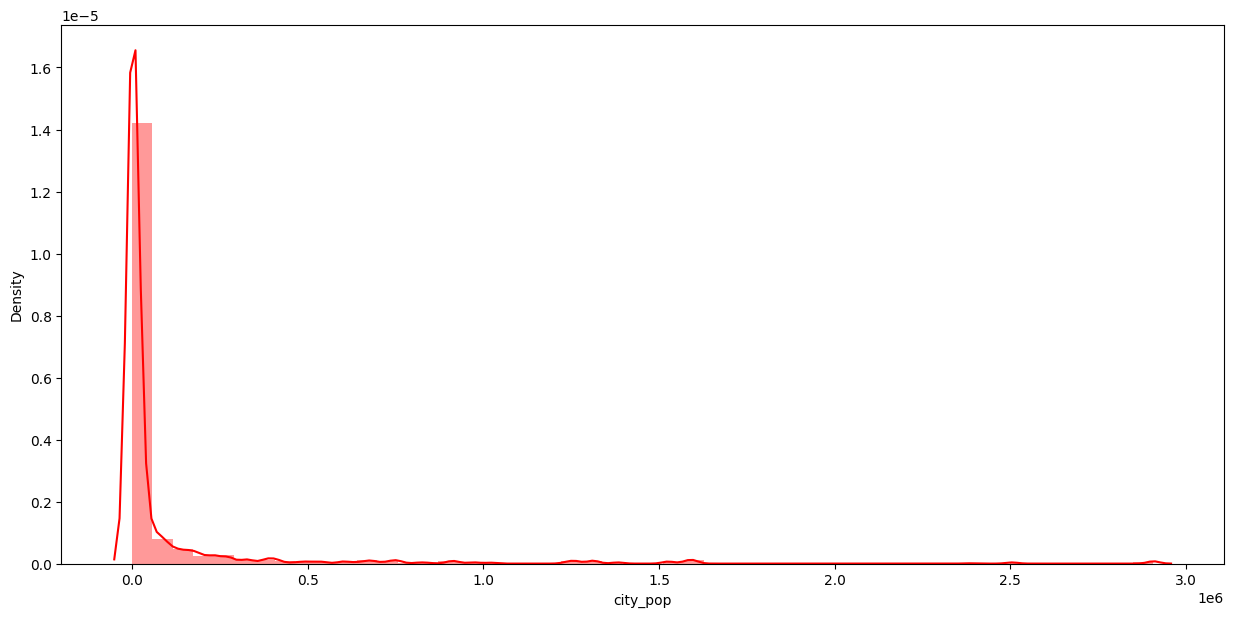

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(df["city_pop"], color="red")
plt.show()

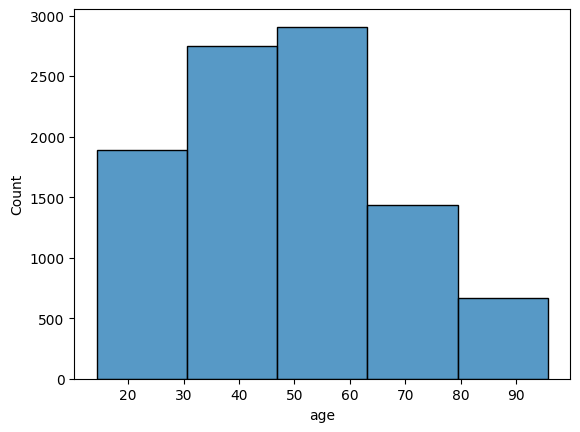

In [24]:
df["age"] = df["trans_date"]-df["dob"]

# Convert timedelta to years
df['age'] = df['age'].dt.days / 365.25

sns.histplot(df[df['is_fraud']==1]['age'], bins=5)
plt.show()

In [25]:
df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
df['trans_year'] = pd.DatetimeIndex(df['trans_date']).year

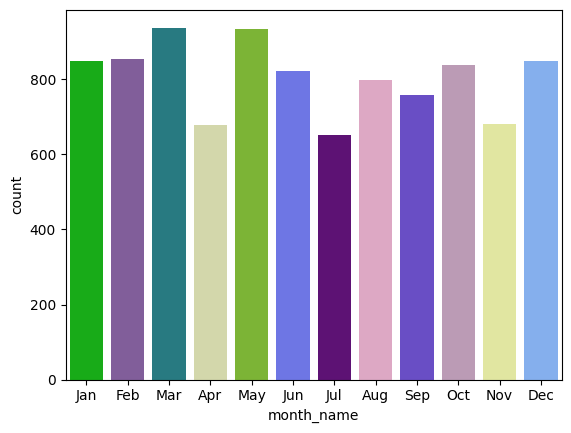

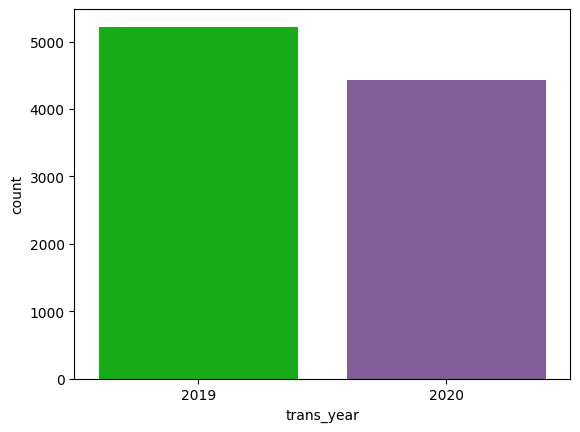

In [26]:
import calendar

df['month_name'] = df['trans_month'].apply(lambda x : calendar.month_abbr[x])

sns.countplot(data=df[df['is_fraud_cat'] == 'Fraud'], x='month_name', palette=random_colors)
plt.show()

sns.countplot(data=df[df['is_fraud_cat'] == 'Fraud'], x='trans_year', palette=random_colors)
plt.show()

In [27]:
df['latitude_distance'] = abs(round(df['merch_lat'] - df['lat'], 2))
df['longitude_distance'] = abs(round(df['merch_long']-df['long'], 2))

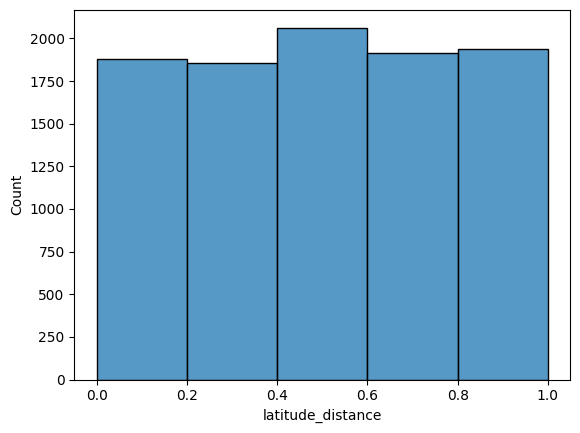

In [28]:
sns.histplot(df[df['is_fraud']==1]['latitude_distance'], bins=5)
plt.show()

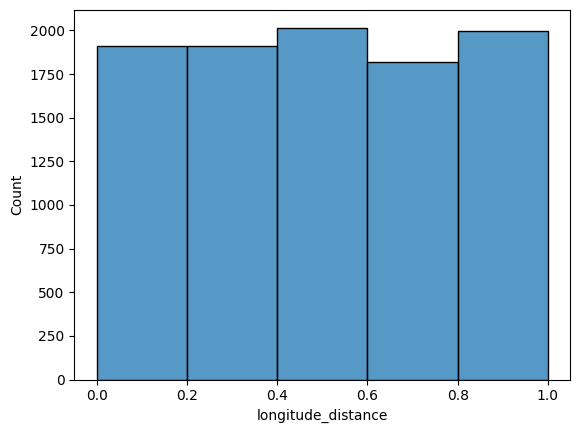

In [29]:
sns.histplot(df[df['is_fraud']==1]['longitude_distance'], bins=5)
plt.show()

In [30]:
df_copy = df.copy()
drop_cols = ['trans_date_trans_time','cc_num','merchant','first','last','street','zip','trans_num','unix_time' ,'city','lat','long','job','dob','merch_lat','merch_long','trans_date','month_name', 'state', 'is_fraud_cat']
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   category            object 
 1   amt                 float64
 2   gender              object 
 3   city_pop            int64  
 4   is_fraud            int64  
 5   age                 float64
 6   trans_month         int32  
 7   trans_year          int32  
 8   latitude_distance   float64
 9   longitude_distance  float64
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 127.2+ MB


In [31]:
drop_cols1 = ['trans_date_trans_time','cc_num','merchant','first','last','street','zip','trans_num','unix_time' ,'city','lat','long','dob','merch_lat','merch_long','trans_date','month_name', 'is_fraud_cat']
df_copy.drop(drop_cols1, axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   category            object 
 1   amt                 float64
 2   gender              object 
 3   state               object 
 4   city_pop            int64  
 5   job                 object 
 6   is_fraud            int64  
 7   age                 float64
 8   trans_month         int32  
 9   trans_year          int32  
 10  latitude_distance   float64
 11  longitude_distance  float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 155.5+ MB


In [32]:
df['gender'] = df['gender'].replace({'F': 0, 'M' :1})

In [33]:
df = pd.get_dummies(df, columns=['category'], drop_first=True)
df[df.filter(like='category_').columns] = df[df.filter(like='category_').columns].astype(int)
df

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitude_distance,longitude_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.814511,1,2019,0.07,0.87,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.531143,1,2019,0.27,0.02,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.950034,1,2019,0.97,0.11,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.969884,1,2019,0.80,0.45,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.763860,1,2019,0.25,0.83,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,1,519,0,54.880219,12,2020,0.55,0.56,0,...,0,1,0,0,0,0,0,0,0,0
1852390,111.84,1,28739,0,21.013005,12,2020,0.62,0.75,0,...,0,0,0,1,0,0,0,0,0,0
1852391,86.88,0,3684,0,39.088296,12,2020,0.46,0.81,0,...,0,0,0,1,0,0,0,0,0,0
1852392,7.99,1,129,0,55.044490,12,2020,0.15,0.63,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
X = df.drop(columns=['is_fraud'], axis=1)
y = df['is_fraud']

In [35]:
X.shape, y.shape

((1852394, 21), (1852394,))

In [36]:
y.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [37]:
## balancing data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")

X, y = smote.fit_resample(X, y)

In [38]:
X.shape, y.shape

((3685486, 21), (3685486,))

In [39]:
y.value_counts()

is_fraud
0    1842743
1    1842743
Name: count, dtype: int64

In [40]:
## scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X

array([[1.37142936e-04, 0.00000000e+00, 1.19449117e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66969625e-03, 0.00000000e+00, 4.33484697e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.56911555e-03, 1.00000000e+00, 1.42121054e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.80255520e-04, 0.00000000e+00, 9.80157066e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.02489790e-02, 1.00000000e+00, 1.22758738e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.71013675e-02, 0.00000000e+00, 1.07927369e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2948388, 21), (2948388,), (737098, 21), (737098,))

In [42]:
y_test.value_counts(), y_train.value_counts()

(is_fraud
 1    368932
 0    368166
 Name: count, dtype: int64,
 is_fraud
 0    1474577
 1    1473811
 Name: count, dtype: int64)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def metric_evaluation():
    print("accuracy :", accuracy_score(y_test, y_pred))
    print("classification_report :\n", classification_report(y_test, y_pred))
    print("confusion_matrix :\n", confusion_matrix(y_test, y_pred, normalize="true"))

In [45]:
metric_evaluation()

accuracy : 0.9023467707143419
classification_report :
               precision    recall  f1-score   support

           0       0.91      0.90      0.90    368166
           1       0.90      0.91      0.90    368932

    accuracy                           0.90    737098
   macro avg       0.90      0.90      0.90    737098
weighted avg       0.90      0.90      0.90    737098

confusion_matrix :
 [[0.89535699 0.10464301]
 [0.09067796 0.90932204]]


Text(50.722222222222214, 0.5, 'ACTUAL')

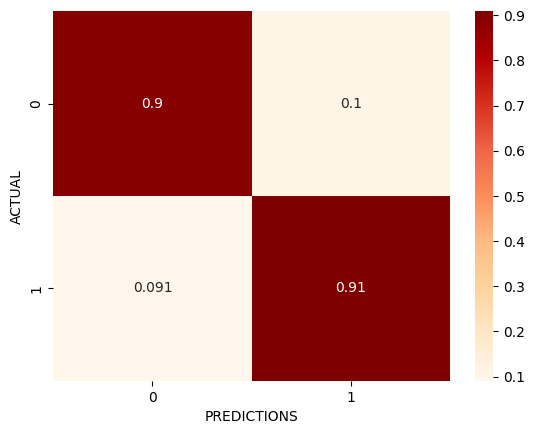

In [46]:

cf = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd')
plt.xlabel('PREDICTIONS')
plt.ylabel('ACTUAL')